# 이미지 변환

In [6]:
import matplotlib
import matplotlib.font_manager as fm

matplotlib.use('Agg')
#matplotlib.rc('font', family="D2Coding")
# [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_location = 'C:\\Users\\62190\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf' # ex - 또는 ./utils/NanumBarunGothic.ttf
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

from patsy import *
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

In [3]:
matplotlib.use('Agg')
#matplotlib.rc('font', family="D2Coding")
# [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_location = 'C:\\Users\\62190\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf' # ex - 또는 ./utils/NanumBarunGothic.ttf
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

## 동차좌표와 어파인 변환

앞으로 설명할 이미지의 변환에 관한 수식을 이해하기 위해서는 **동차좌표(Homogenous Coordinate)** 의 개념을 먼저 알아두어야 한다. 
동차좌표는 2차원상의 점의 위치를 2차원 벡터가 아닌 3차원 벡터로 표현하는 방법이다.
다음과 같이 마지막 원소로 1을 추가하여 만든다.

$$ {x} = \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} $$

마지막 원소가 1이 아닌 경우에는 1로 스케일링 시킨 것과 동일한 위치를 가리킨다.

$$ \begin{bmatrix} x \\ y \\ w \end{bmatrix} = \begin{bmatrix} x/w \\ y/w \\ 1 \end{bmatrix} $$

동차좌표를 사용하면 변환행렬을 곱하여 선형변환을 하고, 평행하게 $t=(t_x,t_y)$만큼 이동하는 과정

$$ \begin{bmatrix}x' \\ y'\end{bmatrix} = {A}\begin{bmatrix}x \\ y\end{bmatrix} + \begin{bmatrix}t_x \\ t_y\end{bmatrix}= {A}\begin{bmatrix}x \\ y\end{bmatrix} + t  $$

를 다음처럼 한번의 행렬 곱으로 나타낼 수 있기 때문에 수식 및 연산이 간단해진다. 이 수식을 이용하여 이미지를 변환하는 것을 어파인 변환이라고 한다.

$$ \begin{bmatrix}x' \\ y' \\ 1\end{bmatrix}= \begin{bmatrix} {A} & {t} \\ {0} &  1\end{bmatrix}\begin{bmatrix}x \\ y \\ 1\end{bmatrix}$$

이렇게 하나의 $3 \times 3$ 행렬로 3차원 좌표의 변환을 할 때, 이 $3\times 3$ 행렬을 사영행렬(homography matrix)이라고 부른다.

$$ {x'} = {H} {x} $$


## 강체변환



강체변환(rigid transform)은 유클리드 변환(Euclidean transformation)이라고도 불리우며, 회전($\theta$), 이동(${t}$), 두가지 요소만 사용하여 이미지를 변환한다. homography matrix는 아래와 같다. 

$$ {H} = \begin{bmatrix} \cos\theta & -\sin\theta & t_x \\ \sin\theta & \cos\theta & t_y \\ 0 & 0 & 1 \end{bmatrix} $$

## 유사변환


유사변환(similarity transform)은 확대/축소(s), 회전($\theta$), 이동(${t}$), 세가지 요소를 사용하여 이미지를 변환한다. 변환행렬은 다음과 같다.

$$ {H} = \begin{bmatrix} s\cos\theta & -s\sin\theta & t_x \\ s\sin\theta & s\cos\theta & t_y \\ 0 & 0 & 1 \end{bmatrix} $$

아래 코드는 90도 회전을 하고, x, y축으로 각 100씩 평행이동 후 이미지 크기를 반으로 줄이는 기능을 한다. 

변환행렬을 만들 때는 `cv2.getRotationMatrix2D` 함수를 사용한다. 

```
getRotationMatrix2D(center, angle, scale)
```

입력인수는 다음과 같다.

* `center`: 이미지의 중심 좌표
* `angle`: 회전 시키는 각도 $\theta$(시계 반대방향)
* `scale`: 변환하려는 크기 비율 $s$

주의 할 점은 이론적으로는 사영행렬이 위 식과 같이 $3 \times 3$ 행렬이지만, OpenCV에서는 마지막 행을 생략하고 $3 \times 2$ 변환행렬을 사용할 수도 있다.

변환행렬을 실제로 이미지에 적용하여 어파인 변환을 할 때는 ``warpAffine`` 함수를 사용한다.

In [4]:
import cv2
import skimage.data

img_astro = skimage.data.astronaut()
img = cv2.cvtColor(img_astro, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape[:2]

# 이미지의 중심점을 기준으로 30도 회전. 크기는 70%
H = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.7)

# 50만큼 평행이동
H[:, 2] += 50

H

array([[  0.60621778,   0.35      ,  61.20824764],
       [ -0.35      ,   0.60621778, 240.40824764]])

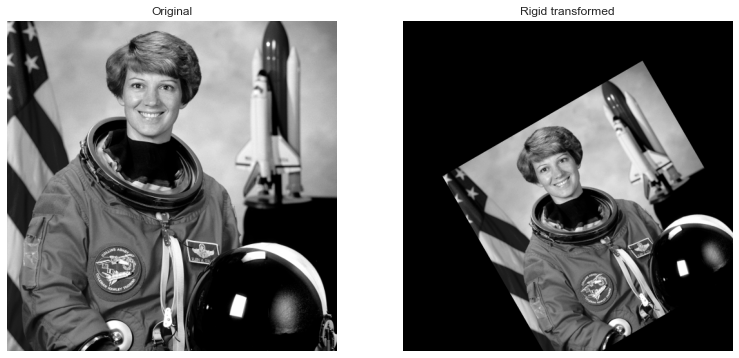

In [7]:
dst = cv2.warpAffine(img, H, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 13))
ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(img, cmap=plt.cm.gray)
ax2.set_title("Rigid transformed")
ax2.axis("off")
ax2.imshow(dst, cmap=plt.cm.gray)
plt.show()

## 3점 어파인 변환

어파인 변환에 사용되는 행렬을 지정하는데는 3점이 어떻게 변환되는지만 알면 된다.
OpenCV에는 주어진 두 쌍의 3점으로부터 어파인 변환을 위한 사영행렬을 계산하는 `getAffineMatrix` 함수를 제공한다.

In [13]:
img = sp.misc.face()
rows, cols, ch = img.shape

pts1 = np.float32([[200, 200], [200, 600], [800, 200]])
pts2 = np.float32([[170, 150], [170, 500], [850, 100]])

pts_x1, pts_y1 = zip(*pts1)
pts_x2, pts_y2 = zip(*pts2)

H_affine = cv2.getAffineTransform(pts1, pts2)
H_affine

array([[  1.13333333,   0.        , -56.66666667],
       [ -0.08333333,   0.875     ,  -8.33333333]])

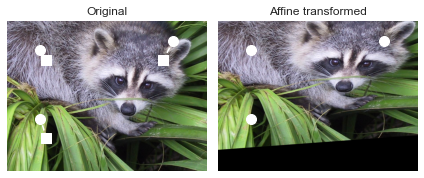

In [14]:
img2 = cv2.warpAffine(img, H_affine, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2)

ax1.set_title("Original")
ax1.imshow(img)
ax1.scatter(pts_x1, pts_y1, c='w', s=100, marker="s")
ax1.scatter(pts_x2, pts_y2, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x1, pts_x2), axis=-1))),
         list(zip(*np.stack((pts_y1, pts_y2), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Affine transformed")
ax2.imshow(img2)
ax2.scatter(pts_x2, pts_y2, c='w', s=100)
ax2.axis("off")

plt.tight_layout()
plt.show()

## 원근변환

원근변환(perspective transform)은 핀홀 카메라(pin-hole camera) 모형을 사용하여 2차원 이미지를 변환하는 방법이다. 원근법 변환은 직선의 성질만 유지가 되고, 선의 평행성은 유지가 되지 않는 변환이다.

<img src="https://datascienceschool.net/upfiles/4367342a583648f6872a1763b6412323.png">

그림 2.4.1 : 핀홀카메라 모형 

원근변환을 지정하는데는 4점이 필요하다. OpenCV에는 주어진 두 쌍의 4점으로부터 원근변환을 위한 사영행렬을 계산하는 `getPerspectiveTransform` 함수를 제공한다. 실제 변환에는 `warpPerspective` 함수를 사용한다.

In [16]:
pts1 = np.float32([[200, 200], [200, 600], [800, 200], [800, 600]])
pts2 = np.float32([[300, 300], [300, 500], [600, 100], [700, 500]])

H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
H_perspective

array([[-8.43769499e-17, -7.62711864e-02,  2.59322034e+02],
       [-3.38983051e-01,  2.79661017e-01,  2.55932203e+02],
       [-6.77966102e-04, -2.54237288e-04,  1.00000000e+00]])

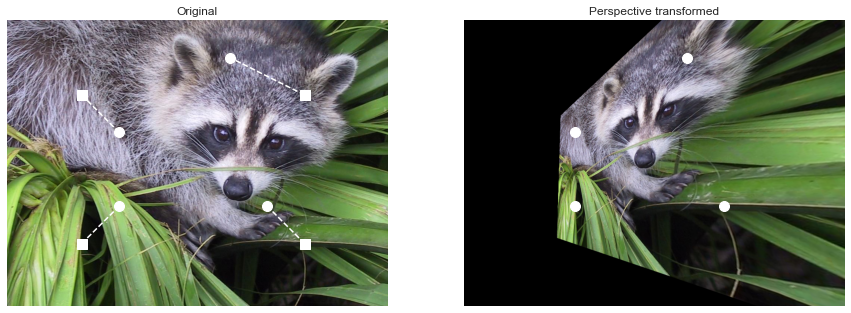

In [17]:
img2 = cv2.warpPerspective(img, H_perspective, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 15))

pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

ax1.set_title("Original")
ax1.imshow(img, cmap=plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker="s")
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")



ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()

#### 연습 문제 1

다음 왼쪽 이미지를 원근변환하여 오른쪽 이미지와 같이 펼쳐라. 이미지는 다음 명령으로 내려받는다.

```
!wget https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png -O receipt.png
```

<img src="https://datascienceschool.net/upfiles/d60290206a8b4bd19ecaffe71a83d6df.png">

In [37]:
img = cv2.imread("receipt2.png") # 이미지 불러오기

pts1 = np.float32([list(leftmost), list(rightmost), list(topmost), list(bottommost)])
pts2 = np.float32([[0, 0], [1184, 1578], [1184, 0], [0, 1578]])

H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
H_perspective

array([[ 2.18589509e+00, -3.10627197e-01, -4.69507257e+02],
       [ 6.54022224e-02,  2.02746889e+00, -6.04708948e+02],
       [-1.60117415e-04,  3.76471849e-04,  1.00000000e+00]])

In [34]:
bottommost

(418, 1430)

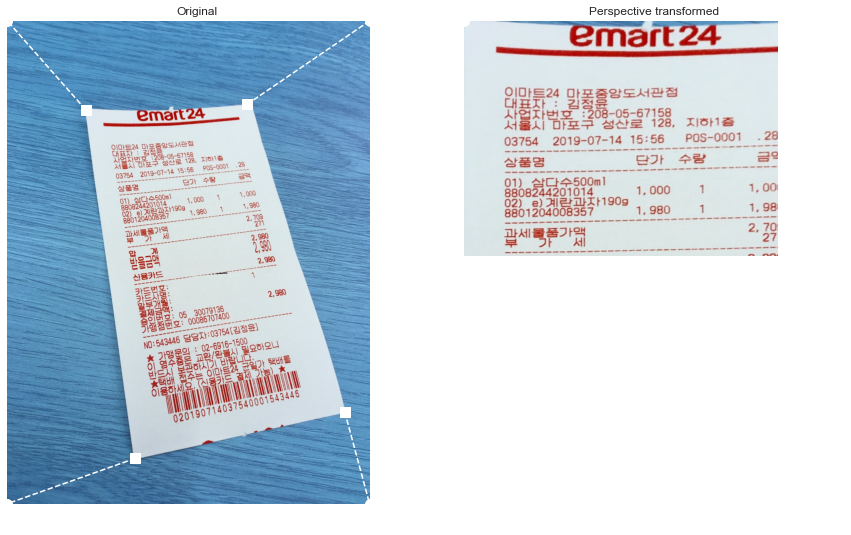

In [42]:
img2 = cv2.warpPerspective(img, H_perspective, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 15))

pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

ax1.set_title("Original")
ax1.imshow(img, cmap=plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker="s")
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")


ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()